<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## 📊 Exploratory Data Analysis (EDA)

### ✅ Principales insights:

- **29.87%** de los comercios tienen presencia web.
- **Tandil** y **Olavarria** lideran en digitalización.
- **Instagram 19.2%** y **Facebook 18.11** concentran la presencia en RRSS.
- El puntaje promedio se mantiene **alto y constante (4.0 - 4.4)**.
- **Categorías más comunes:** Hay 621 categorías registradas, lo que genera que los datos no sean precisos
  - **Tienda de Ropa:** 7,92% con 464 registros
  - **Tienda de Alimentación:** 6,25% con 366 registros
  - **Comercio:** 5,68% con 333 registros
  - **Agencia Inmobiliaria:** 3,07%

</div>

In [69]:
# Se importan las librerias necesarias para la manipulación y visualización de datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Carga de datos desde archivo CSV
df = pd.read_csv('../CleanData/Regional.csv')

In [71]:
# Obtenemos número de filas y columnas del DataFrame
df.shape

(5859, 16)

In [72]:
# Obtenemos el número de elementos en el DataFrame
df.size

93744

In [73]:
# Información del DataFrame: 
# Número de filas y columnas, nombres y tipos de datos de las columnas,
# valores no nulos en cada columna, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5859 non-null   object 
 1   categoryName  5859 non-null   object 
 2   website       5859 non-null   object 
 3   street        5859 non-null   object 
 4   phone         5859 non-null   object 
 5   city          5859 non-null   object 
 6   state         5859 non-null   object 
 7   location/lat  5859 non-null   float64
 8   location/lng  5859 non-null   float64
 9   totalScore    5859 non-null   float64
 10  rank          5859 non-null   int64  
 11  imageUrl      5859 non-null   object 
 12  imagesCount   5859 non-null   float64
 13  reviewsCount  5859 non-null   int64  
 14  scrapedAt     5859 non-null   object 
 15  searchString  5859 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 732.5+ KB


In [74]:
# Análisis de tipos de datos para identificar variables numéricas y categóricas
df.dtypes

title            object
categoryName     object
website          object
street           object
phone            object
city             object
state            object
location/lat    float64
location/lng    float64
totalScore      float64
rank              int64
imageUrl         object
imagesCount     float64
reviewsCount      int64
scrapedAt        object
searchString     object
dtype: object

In [75]:
# Convertir fecha de scraping manteniendo formato datetime
# Esto permite análisis temporales futuros (ej: comparar con scraping en 6 meses)
df['scrapedAt'] = pd.to_datetime(
    df['scrapedAt'], 
    errors='coerce',  # Maneja fechas inválidas sin romper el código
    utc=True          # Estandariza zona horaria para comparaciones
).dt.floor('s').dt.tz_localize(None)  # Elimina timezone para visualización limpia
df['scrapedAt']

0      2025-05-19 00:03:00
1      2025-05-19 00:03:02
2      2025-05-19 00:03:02
3      2025-05-19 00:03:02
4      2025-05-19 00:03:02
               ...        
5854   2025-07-30 15:10:41
5855   2025-07-30 15:10:41
5856   2025-07-30 15:10:56
5857   2025-07-30 15:10:58
5858   2025-07-30 15:10:59
Name: scrapedAt, Length: 5859, dtype: datetime64[ns]

In [76]:
# Visualizar las primeras 10 filas para entender la estructura
df.head(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,La Casa De Los Trofeos,Comercio,Incomplete,Rivadavia 496,Incomplete,Azul,Provincia de Buenos Aires,-36.774661,-59.862623,0.0,1,Incomplete,0.0,0,2025-05-19 00:03:00,Comercio
1,La Escoba Loca,Tienda De Artículos Para El Hogar,Incomplete,Colón Nte. 117,+54 9 2281 50-2996,Azul,Provincia de Buenos Aires,-36.767281,-59.851848,4.8,1,https://lh3.googleusercontent.com/gps-cs-s/AC9...,44.0,73,2025-05-19 00:03:02,Comercio
2,Artículos Magali,Tienda General,Incomplete,Monseñor Caneva Nte. 160,+54 9 2281 31-0611,Azul,Provincia de Buenos Aires,-36.774353,-59.841898,4.3,2,Incomplete,0.0,12,2025-05-19 00:03:02,Comercio
3,Autoservicio San Jorge,Comercio,Incomplete,Burgos Nte. 100,+54 9 2281 42-3119,Azul,Provincia de Buenos Aires,-36.768145,-59.851305,4.6,3,https://lh3.googleusercontent.com/p/AF1QipPV0V...,6.0,127,2025-05-19 00:03:02,Comercio
4,Asociacion Latina De Exportacion Sa,Comercio,Incomplete,Julio Argentino Roca 846,+54 9 2281 43-0338,Azul,Provincia de Buenos Aires,-36.785067,-59.859254,3.3,4,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,4,2025-05-19 00:03:02,Comercio
5,Jaque Mate,Comercio,Incomplete,"IAA, Colón 45",Incomplete,Azul,Provincia de Buenos Aires,-36.769319,-59.854343,5.0,5,https://lh3.googleusercontent.com/gps-cs-s/AC9...,11.0,2,2025-05-19 00:03:02,Comercio
6,Eco System Sa,Comercio,Incomplete,Av. Mujica,+54 9 2281 43-0966,Azul,Provincia de Buenos Aires,-36.766106,-59.836292,5.0,6,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,1,2025-05-19 00:03:02,Comercio
7,Despensa Y Anexos Biyo,Tienda De Alimentación,Incomplete,Aldaz 451-499,+54 9 2281 49-3233,Azul,Provincia de Buenos Aires,-36.764525,-59.846145,4.5,7,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,36,2025-05-19 00:03:02,Comercio
8,El Trueque Azul,Comercio,Incomplete,Incomplete,Incomplete,Azul,Provincia de Buenos Aires,-36.758668,-59.873928,4.0,8,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,10,2025-05-19 00:03:02,Comercio
9,La Fiambreria,Carnicería,Incomplete,Necochea 74 B7300FVB,Incomplete,Azul,Provincia de Buenos Aires,-36.773690,-59.850710,0.0,9,Incomplete,0.0,0,2025-05-19 00:03:02,Comercio


In [77]:
# Muestra de las últimas filas del DataFrame
df.tail(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
5849,Polideportivo Municipal,Escuela Deportiva,Incomplete,Incomplete,Incomplete,Rauch,Provincia de Buenos Aires,-36.770290,-59.099804,5.0,7,https://lh3.googleusercontent.com/gps-cs-s/AC9...,2.0,20,2025-07-30 15:10:11,Deportivo
5850,Burbujas Lavandería,Servicio De Lavandería,Incomplete,Almte. Brown 254,+54 9 249 448-5227,Rauch,Provincia de Buenos Aires,-36.780576,-59.088608,5.0,16,https://lh3.googleusercontent.com/gps-cs-s/AC9...,7.0,39,2025-07-30 15:10:20,Ropa
5851,Bo. Jardín Empleados De Comercio,Complejo De Viviendas,Incomplete,Sin Nombre,Incomplete,Rauch,Provincia de Buenos Aires,-36.776126,-59.077801,4.4,25,Incomplete,0.0,30,2025-07-30 15:10:24,Comercio
5852,Taller Mecánico Juan Carlos Botta,Taller Mecánico,Incomplete,Azcuénaga 299-201,+54 9 249 450-1086,Rauch,Provincia de Buenos Aires,-36.772244,-59.079592,0.0,25,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,0,2025-07-30 15:10:27,Vehiculos
5853,Taller Mecanico Penedo,Taller De Automóviles,Incomplete,RP30 1400,+54 9 249 434-5802,Rauch,Provincia de Buenos Aires,-36.763515,-59.089012,0.0,30,https://lh3.googleusercontent.com/gps-cs-s/AC9...,7.0,0,2025-07-30 15:10:35,Vehiculos
5854,Cerrajeria Hugo,Cerrajero,Incomplete,Brandsen 1792,+54 9 2297 44-2572,Rauch,Provincia de Buenos Aires,-36.771912,-59.089686,4.6,19,https://lh3.googleusercontent.com/gps-cs-s/AC9...,3.0,20,2025-07-30 15:10:41,Construccion
5855,Signos Arte Grafico,Servicios De Diseño,Incomplete,Av. San Martín 920,+54 9 249 469-4342,Rauch,Provincia de Buenos Aires,-36.772835,-59.086239,0.0,16,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 15:10:41,Construccion
5856,Registro Nacional De La Propiedad Del Automotor,Agencia De Registro De Automóviles,Incomplete,Cnel. Suárez 86,+54 9 2297 44-0468,Rauch,Provincia de Buenos Aires,-36.776637,-59.089069,4.4,17,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,20,2025-07-30 15:10:56,Vehiculos
5857,Carpintería Tedesco Hermanos,Carpintero,Incomplete,"9 de Julio 145, B7203ABC",+54 9 249 435-9904,Rauch,Provincia de Buenos Aires,-36.775892,-59.093677,0.0,28,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,0,2025-07-30 15:10:58,Construccion
5858,Zapatería Tofi,Zapatero,Incomplete,Av. Gral. Paz,+54 9 249 421-6088,Rauch,Provincia de Buenos Aires,-36.777376,-59.078009,4.9,29,https://lh3.googleusercontent.com/gps-cs-s/AC9...,3.0,16,2025-07-30 15:10:59,Tienda


In [78]:
# Muestra aleatoria de 10 filas del DataFrame para una inspección rápida
df.sample(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
5725,Expert Mundo Hogar,Tienda De Muebles,Incomplete,Av. Pres. Juan Domingo Perón 369,+54 9 2297 44-0512,Rauch,Provincia de Buenos Aires,-36.771108,-59.092721,0.0,18,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-06-15 22:40:57,Muebles
1310,Espensa Avenida,Tienda De Alimentación,Incomplete,Av. de los Trabajadores,Incomplete,Olavarría,Provincia de Buenos Aires,-36.875564,-60.315059,0.0,13,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-06-15 23:31:30,Comercio
4624,Barros Argentinos Villa Italia,Comercio,Incomplete,Quintana 611,+54 9 249 445-4298,Tandil,Provincia de Buenos Aires,-37.307013,-59.143067,4.4,9,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,9,2025-05-04 16:08:17,Comercio
4964,Kiosco El Semáforo,Kiosco,Incomplete,"Avenida Lunghi, Piccirilli &",Incomplete,Tandil,Provincia de Buenos Aires,-37.299531,-59.171488,5.0,13,https://lh3.googleusercontent.com/gps-cs-s/AC9...,4.0,1,2025-06-15 23:38:50,Comercio
4485,Lavandería Del Sur,Servicio De Lavandería,Incomplete,Fugl 987,+54 9 249 420-9080,Tandil,Provincia de Buenos Aires,-37.336373,-59.123860,4.2,13,https://lh3.googleusercontent.com/p/AF1QipPc8a...,19.0,55,2025-05-29 00:17:23,Servicios
2064,Remo Cae,Club Deportivo,Incomplete,Incomplete,Incomplete,Olavarría,Provincia de Buenos Aires,-36.894712,-60.334665,4.0,19,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,1,2025-07-30 14:43:01,Deportivo
310,Rpva - Centro De Grabado De Autopartes - Azul,Oficina De Registro,Incomplete,Av. Mitre 282,+54 9 2281 58-8413,Azul,Provincia de Buenos Aires,-36.773773,-59.863563,4.5,16,https://lh3.googleusercontent.com/gps-cs-s/AC9...,10.0,50,2025-07-30 14:51:09,Vehiculos
3897,Taller Mecánico Mp,Taller De Reparación De Automóviles,https://www.guia-dorada.com.ar/guia/aviso-tall...,Av. Falucho 1294,+54 9 249 469-3224,Tandil,Provincia de Buenos Aires,-37.319942,-59.106270,4.5,18,https://lh3.googleusercontent.com/p/AF1QipOYXd...,23.0,77,2025-05-28 23:35:29,Electronica
3798,Inmobiliaria Terni Lucero,Agencia Inmobiliaria,https://inmobiliariaterni.com.ar/,Maipú 639,+54 9 249 442-5366,Tandil,Provincia de Buenos Aires,-37.329918,-59.133849,4.3,76,https://lh3.googleusercontent.com/p/AF1QipOo-P...,4.0,19,2025-06-11 18:02:45,Venta
3817,Antonio O. Comiso Campos Propiedades,Agencia Inmobiliaria,Incomplete,Av. España 255 / 257,+54 9 249 423-1369,Tandil,Provincia de Buenos Aires,-37.324338,-59.143420,4.1,49,https://lh3.googleusercontent.com/gps-proxy/AL...,2.0,10,2025-06-11 18:02:59,Venta


In [79]:
# Calcular métricas de completitud por ciudad
completitud = (df.groupby('city').agg(
        phone_complete_porc=('phone', lambda x: round((x.str.lower().ne('incomplete').mean() * 100), 2)),
        street_complete_porc=('street', lambda x: round((x.str.lower().ne('incomplete').mean() * 100), 2)),
        phone_incomplete_total=('phone', lambda x: (x.str.lower() == 'incomplete').sum()),
        street_incomplete_total=('street', lambda x: (x.str.lower() == 'incomplete').sum())
    )
    .reset_index()
)
completitud

,city,phone_complete_porc,street_complete_porc,phone_incomplete_total,street_incomplete_total
0,Azul,64.44,92.31,453,98
1,Benito Juárez,62.68,92.88,131,25
2,Olavarría,76.10,95.52,357,67
3,Rauch,58.91,88.52,136,38
4,Tandil,75.76,96.01,584,96


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Medición de completitud en `street` y `phone` por ciudad

1. Agrupamos por la columna **city**.
2. Para cada ciudad calculamos:
   - **Porcentaje de completitud** = registros distintos de `"incomplete"`.
   - **Total de incompletos** = cantidad de registros con `"incomplete"`.
3. Así obtenemos un DataFrame comparativo entre ciudades para evaluar la calidad de los datos.

</div>

In [80]:
# Del DataFrame completitud que ya tienes, puedes sacar los totales así:
total_phone_incomplete = completitud['phone_incomplete_total'].sum()
total_street_incomplete = completitud['street_incomplete_total'].sum()

print(f"📊 Registros sin número de telefono ingresado: {total_phone_incomplete:,}")
print(f"📊 Registros sin dirección ingresada: {total_street_incomplete:,}")

📊 Registros sin número de telefono ingresado: 1,661
📊 Registros sin dirección ingresada: 324


In [81]:
# Calculamos la proporción de comercios con y sin presencia web.
total_registros = len(df)
registros_con_web = df[df['website'] != 'Incomplete'].shape[0]
porcentaje_con_web = (registros_con_web / total_registros) * 100

print(f"\nResumen de Presencia Web a Nivel General \n---------------------------------------")
print(f"Total de negocios en la muestra: {total_registros:,}")
print(f"Negocios con sitio web: {registros_con_web:,} ({porcentaje_con_web:.2f}%)")
print(f"Negocios sin sitio web: {total_registros - registros_con_web:,} ({(100-porcentaje_con_web):.2f}%)")


Resumen de Presencia Web a Nivel General 
---------------------------------------
Total de negocios en la muestra: 5,859
Negocios con sitio web: 1,750 (29.87%)
Negocios sin sitio web: 4,109 (70.13%)


In [82]:
total_registros = df.groupby('city').size()
registros_incomplete = df[df['website'].str.contains('Incomplete', case=False, na=False)].groupby('city').size()

# Crear tabla resumen
resumen = pd.DataFrame({
    'Total Comercios': total_registros,
    'Website Incompletos': registros_incomplete,
}).fillna(0)

resumen['Website Completos'] = resumen['Total Comercios'] - resumen['Website Incompletos']
resumen['% Completos'] = (resumen['Website Completos'] / resumen['Total Comercios'] * 100).round(2)
resumen['% Incompletos'] = (resumen['Website Incompletos'] / resumen['Total Comercios'] * 100).round(2)

resumen = resumen.sort_values('Total Comercios', ascending=False)

print("ANÁLISIS DE CALIDAD DE DATOS POR CIUDAD")
print("=" * 40)
print(f"Dataset: {resumen['Total Comercios'].sum():,} registros en {len(resumen)} ciudades")
print(f"Completitud global: {(resumen['Website Completos'].sum()/resumen['Total Comercios'].sum()*100):.2f}%")
print()

print("TABLA COMPLETA POR CIUDAD:")
print("-" * 100)
print(resumen.to_string())

print(f"\nRANKING DE CIUDADES:")
print("-" * 55)
for i, (ciudad, row) in enumerate(resumen.iterrows(), 1):
    print(f"{i}. {ciudad:<12} | {row['Total Comercios']:>4} registros | {row['% Completos']:>5.2f}% completos")

ANÁLISIS DE CALIDAD DE DATOS POR CIUDAD
Dataset: 5,859 registros en 5 ciudades
Completitud global: 29.87%

TABLA COMPLETA POR CIUDAD:
----------------------------------------------------------------------------------------------------
               Total Comercios  Website Incompletos  Website Completos  % Completos  % Incompletos
city                                                                                              
Tandil                    2409                 1560                849        35.24          64.76
Olavarría                 1494                  997                497        33.27          66.73
Azul                      1274                  994                280        21.98          78.02
Benito Juárez              351                  287                 64        18.23          81.77
Rauch                      331                  271                 60        18.13          81.87

RANKING DE CIUDADES:
--------------------------------------------------

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

💡 ¿Qué hace este código?
- Este código analiza la completitud de los datos de websites en nuestro dataset de comercios, agrupándolos por ciudad. Nos ayuda a entender qué tan completa está nuestra información en cada ubicación.

</div>

In [83]:
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 50)

stats = pd.DataFrame({
    'Métrica': ['Promedio', 'Mediana', 'Mínimo', 'Máximo', 'Desv. Estándar'],
    'Completitud %': [
        resumen['% Completos'].mean(),
        resumen['% Completos'].median(), 
        resumen['% Completos'].min(),
        resumen['% Completos'].max(),
        resumen['% Completos'].std()
    ],
    'Total Comercios': [
        resumen['Total Comercios'].mean(),
        resumen['Total Comercios'].median(),
        resumen['Total Comercios'].min(),
        resumen['Total Comercios'].max(),
        resumen['Total Comercios'].std()
    ]
}).round(2)

print(stats.to_string(index=False))

print(f"\nANÁLISIS COMPARATIVO:")
print("-" * 60)

mejor_ciudad = resumen.loc[resumen['% Completos'].idxmax()]
peor_ciudad = resumen.loc[resumen['% Completos'].idxmin()]
ciudad_media = resumen.loc[(resumen['% Completos'] - resumen['% Completos'].median()).abs().idxmin()]

print(f"🏆 MEJOR: {mejor_ciudad.name} - {mejor_ciudad['% Completos']:.2f}% completos ({mejor_ciudad['Total Comercios']} registros)")
print(f"📊 MEDIANA: {ciudad_media.name} - {ciudad_media['% Completos']:.2f}% completos ({ciudad_media['Total Comercios']} registros)")  
print(f"⚠️  PEOR: {peor_ciudad.name} - {peor_ciudad['% Completos']:.2f}% completos ({peor_ciudad['Total Comercios']} registros)")

brecha = mejor_ciudad['% Completos'] - peor_ciudad['% Completos']
print(f"📈 BRECHA: {brecha:.2f} puntos porcentuales entre mejor y peor")

# Correlación tamaño vs completitud
correlacion = resumen['Total Comercios'].corr(resumen['% Completos'])
print(f"\n🔗 CORRELACIÓN:")
print("-" * 60)
print(f"   Tamaño vs Completitud: {correlacion:.3f}")
if correlacion > 0.3:
    print("   → Ciudades más grandes tienden a tener mejor completitud")
elif correlacion < -0.3:
    print("   → Ciudades más grandes tienden a tener menor completitud") 
else:
    print("   → No hay relación clara entre tamaño y completitud")

ESTADÍSTICAS DESCRIPTIVAS
       Métrica  Completitud %  Total Comercios
      Promedio          25.37          1171.80
       Mediana          21.98          1274.00
        Mínimo          18.13           331.00
        Máximo          35.24          2409.00
Desv. Estándar           8.29           869.71

ANÁLISIS COMPARATIVO:
------------------------------------------------------------
🏆 MEJOR: Tandil - 35.24% completos (2409.0 registros)
📊 MEDIANA: Azul - 21.98% completos (1274.0 registros)
⚠️  PEOR: Rauch - 18.13% completos (331.0 registros)
📈 BRECHA: 17.11 puntos porcentuales entre mejor y peor

🔗 CORRELACIÓN:
------------------------------------------------------------
   Tamaño vs Completitud: 0.914
   → Ciudades más grandes tienden a tener mejor completitud


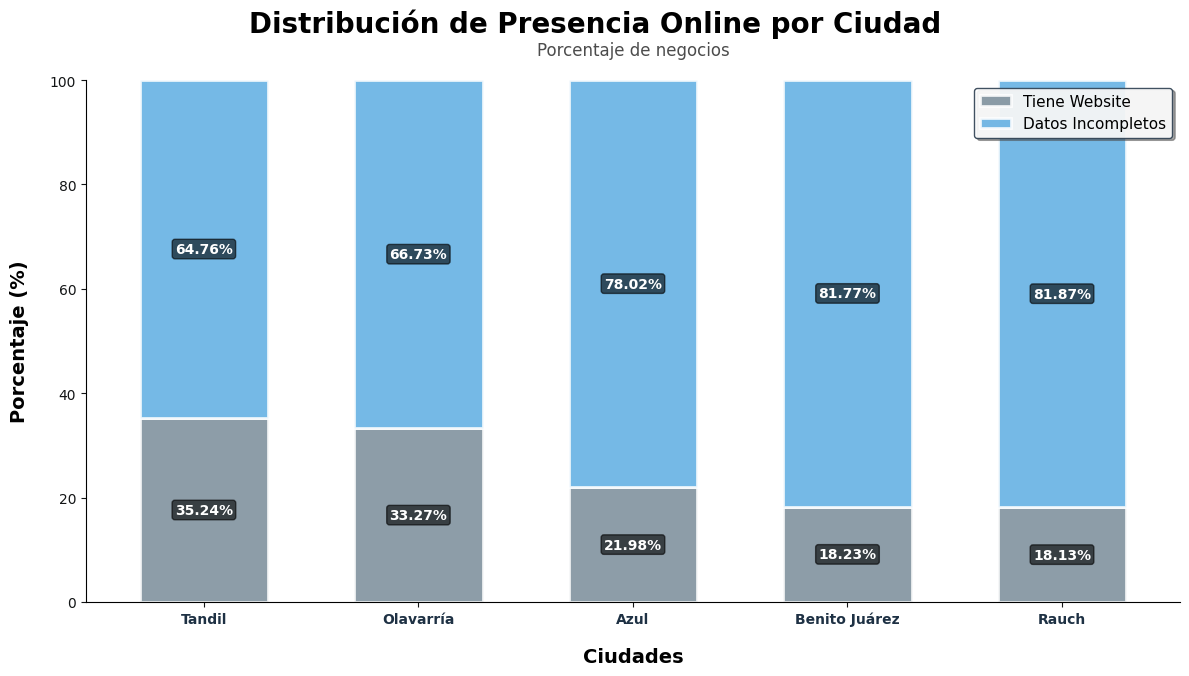

🏆 Tandil tiene el mayor porcentaje de presencia web: 35.24%
⚠️ Rauch tiene el menor porcentaje de presencia web: 18.13%


In [84]:
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')

# Calcular porcentaje incompleto si no existe
if '% Incompletos' not in resumen.columns:
    resumen['% Incompletos'] = 100 - resumen['% Completos']

ax = resumen[['% Completos', '% Incompletos']].plot(
    kind='bar', stacked=True, ax=ax, color=["#798C99", '#5DADE2'], 
    width=0.6, edgecolor='white', linewidth=2, alpha=0.85)

# Títulos y configuración
fig.suptitle('Distribución de Presencia Online por Ciudad', fontsize=20, fontweight='bold', y=0.96)
ax.text(0.5, 1.04, 'Porcentaje de negocios', transform=ax.transAxes, fontsize=12, ha='center', va='bottom', alpha=0.7)
ax.set(ylabel='Porcentaje (%)', xlabel='Ciudades', ylim=(0, 100), yticks=range(0, 101, 20))
ax.set_ylabel('Porcentaje (%)', fontsize=14, fontweight='bold', labelpad=15)
ax.set_xlabel('Ciudades', fontsize=14, fontweight='bold', labelpad=15)

# Leyenda 
ax.legend(['Tiene Website', 'Datos Incompletos'], loc='upper right', bbox_to_anchor=(1, 1), 
          frameon=True, shadow=True, fancybox=True, fontsize=11, facecolor='white', 
          edgecolor='#2C3E50', framealpha=0.9)

# Etiquetas en barras 
for c in ax.containers:
    ax.bar_label(c, labels=[f'{w:.2f}%' if w > 5 else '' for w in c.datavalues], 
                label_type='center', color='white', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6))
                
for spine in ['top', 'right']: 
    ax.spines[spine].set_visible(False)
    
ax.tick_params(axis='both', which='major', labelsize=10, colors="#131516")
plt.xticks(rotation=45 if len(resumen) > 8 else 0, 
           ha='right' if len(resumen) > 8 else 'center', 
           fontweight='bold', fontsize=10, color="#1E3144")

plt.tight_layout()
plt.show()

mejor_web = resumen.loc[resumen['% Completos'].idxmax()]
peor_web = resumen.loc[resumen['% Completos'].idxmin()]

print(f'🏆 {mejor_web.name} tiene el mayor porcentaje de presencia web: {mejor_web["% Completos"]:.2f}%')
print(f'⚠️ {peor_web.name} tiene el menor porcentaje de presencia web: {peor_web["% Completos"]:.2f}%')

In [85]:
# Crear nuevo DataFrame filtrando registros completos
# Excluye filas que contengan 'incomplete' en cualquiera de las columnas
df_full_records = df[~(df == 'Incomplete').any(axis=1)].copy()
# Resultado: Conteo por categoría con datos completos
df_full_records['categoryName'].value_counts()

categoryName
Tienda De Ropa                               104
Agencia Inmobiliaria                          85
Tienda De Materiales Para La Construcción     52
Comercio                                      49
Tienda De Repuestos Para Automóviles          41
                                            ... 
Consultora De Administración Empresarial       1
Club De Baile                                  1
Escuela De Natación                            1
Servicio De Bordado                            1
Bufete                                         1
Name: count, Length: 353, dtype: int64


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

#### 💡 Categorías de comercios con datos completos
**Tienda de Ropa**, **Agencia Inmobiliaria** y **Tienda De Materiales Para La Construcción** son las categorías con más datos completos.

</div>

In [86]:
word = ['facebook', 'instagram', 'mercadolibre', 'mercadoshops', 'tiendanube', 'paginasamarillas', 
        'guia-dorada', 'gurugo', 'wa.me', 'sites.google.', 'region20', 'Incomplete']
# Crear máscara combinada
contains_word = df['website'].str.contains('|'.join(word), case=False, na=False)
# Contar los que NO contienen ninguna de esas palabras
dominio_Propio = (~contains_word).sum()
dominio_Propio
print(f"Un total de {dominio_Propio} comercios tienen dominio propio para páginas web")

Un total de 941 comercios tienen dominio propio para páginas web


In [87]:
# Diccionario: palabra a buscar
words_dict = {
    'facebook': 'Facebook',
    'instagram': 'Instagram',
    'mercadolibre': 'Mercado Libre',
    'mercadoshops': 'MercadoShops',
    'tiendanube': 'TiendaNube',
    'paginasamarillas': 'Páginas Amarillas',
    'guia-dorada': 'Guía Dorada',
    'gurugo': 'Gurugo',
    'wa.me': 'WhatsApp',
    'sites.google.': 'Google Sites',
    'pedidosya': 'PedidosYa',
    'region20': 'Región20'
}
# Conteo por cada palabra
result = pd.Series({
    label: df['website'].str.contains(word, case=False, na=False).sum()
    for word, label in words_dict.items()
})
webs = (~df['website'].str.contains('Incomplete', case=False, na=False)).sum()
result["Dominio Propio"] = dominio_Propio

# Tabla final con porcentajes
result_df = pd.DataFrame({
    "count": result,
    "percentage": (result / webs * 100).round(2)
}).sort_values("count", ascending=False)
result_df

,count,percentage
Dominio Propio,941,53.77
Instagram,337,19.26
Facebook,317,18.11
Guía Dorada,68,3.89
TiendaNube,35,2.00
WhatsApp,15,0.86
Google Sites,13,0.74
Gurugo,8,0.46
MercadoShops,8,0.46
Región20,5,0.29


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

💡 ¿Qué hace este código?
- Este código nos da el porcentaje y cantidad de las plataformas registradas.

</div>

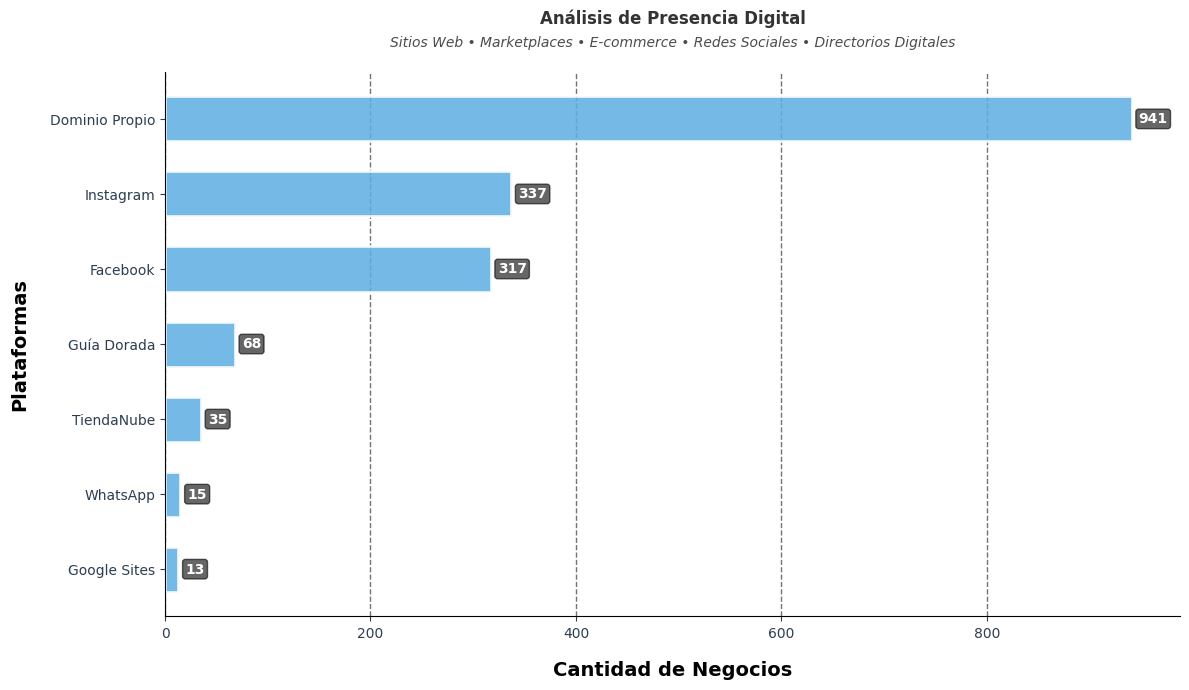

In [88]:
result_df_filtered = result_df[result_df["count"] > 10]
# Invertir orden para que mayor cantidad esté arriba
df_sorted = result_df_filtered.iloc[::-1]

fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')

# Gráfico de barras horizontales
bars = ax.barh(df_sorted.index, df_sorted["count"], color='#5DADE2', 
               edgecolor='white', linewidth=2, alpha=0.85, height=0.6)

# Títulos
ax.text(0.5, 1.08, 'Análisis de Presencia Digital', 
        transform=ax.transAxes, fontsize=12, ha='center', va='bottom', fontweight='bold', alpha=0.8)
ax.text(0.5, 1.04, 'Sitios Web • Marketplaces • E-commerce • Redes Sociales • Directorios Digitales', 
        transform=ax.transAxes, fontsize=10, ha='center', va='bottom', alpha=0.7, style='italic')

# Etiquetas en barras
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height()/2), 
                xytext=(5, 0), textcoords="offset points", ha='left', va='center', 
                fontweight='bold', fontsize=10, color='white',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6))

# Configuración de ejes y grid
ax.set(xlabel="Cantidad de Negocios", ylabel="Plataformas")
ax.set_xlabel("Cantidad de Negocios", fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel("Plataformas", fontsize=14, fontweight='bold', labelpad=15)
ax.xaxis.grid(True, linestyle='--', alpha=0.9, color="#646363", linewidth=1)
ax.set_axisbelow(True)

# Limpieza de bordes y formato
for spine in ['top', 'right']: ax.spines[spine].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10, colors='#2C3E50')
plt.tight_layout(); plt.show()

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

#### 💡 Preferencia de Plataforma Digital

La presencia digital está altamente polarizada. Comercios con **Dominio Propio** (impulsados por cadenas nacionales) lideran con: **(53,77)**, seguidos por Redes Sociales siendo las predominantes :**Instagram (19,26%) y Facebook (18,11%)** . Es notorio que otas plataformas tienen una presencia casi nula, lo que podría indicar que el tipo de negocio analizado es principalmente B2C (Business to Consumer) y enfocado en interacción visual.

</div>


In [89]:
#  Agrupar, contar, ordenar y calcular porcentaje
category_counts = (df.groupby(['categoryName']).size().reset_index(name='website_count').sort_values(by='website_count', ascending=False))

# Agregar columna con porcentaje sobre el total
category_counts['percentage'] = (
    category_counts['website_count'] / category_counts['website_count'].sum() * 100
).round(2)
category_counts

,categoryName,website_count,percentage
573,Tienda De Ropa,464,7.92
444,Tienda De Alimentación,366,6.25
90,Comercio,333,5.68
14,Agencia Inmobiliaria,180,3.07
230,Incomplete,142,2.42
...,...,...,...
579,Tienda De Ropa De Playa,1,0.02
11,Agencia De Subastas Inmobiliarias,1,0.02
7,Agencia De Publicidad,1,0.02
3,Agencia De Alquiler De Grúas,1,0.02


In [90]:
total_categorias = df['categoryName'].nunique()
print(f"Total de categorías distintas: {total_categorias}")

Total de categorías distintas: 621


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

📊 Análisis de Distribución por Categorías

**Resultados Principales:**
- **Tienda de Ropa**: 464 comercios (7.92%)
- **Tienda de Alimentación**: 366 comercios (6.25%) 
- **Comercio**: 333 comercios (5.68%)

🔍 **Problema Encontrado:** Demasiadas Categorías

El dataset tiene **621 categorías diferentes**, lo que causa:

- **Porcentajes muy bajos**: Incluso las categorías más grandes no llegan al 8%
- **Datos dispersos**: Muchas categorías tienen pocos registros
- **Dificulta el análisis**: Es difícil encontrar patrones claros

📈 **Lo que esto significa:**
- Los comercios están clasificados de manera muy específica
- Necesitamos agrupar categorías similares para un mejor análisis
- Ejemplo: "Tienda de Ropa", "Ropa" e "Indumentaria" podrían ser una sola categoría

> **Conclusión**: Aunque tener 621 categorías muestra la variedad de comercios, sería mejor agruparlas en categorías más generales para facilitar el análisis.

</div>

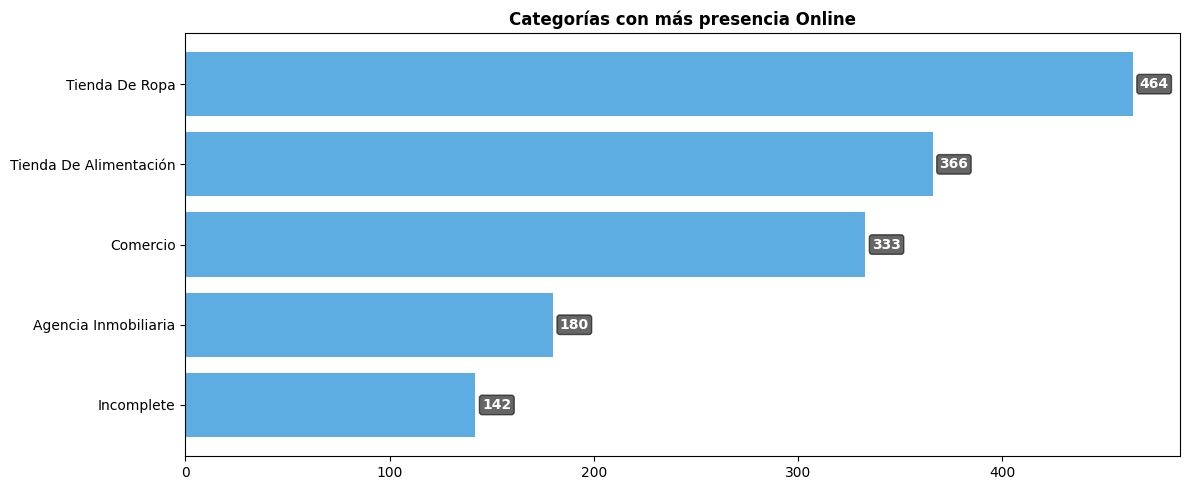

In [91]:
# Tomar solo los 5 primeros
top5 = category_counts.head(5)
# Gráfico
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.barh(
    top5['categoryName'],
    top5['website_count'],
    color="#5DADE2",
    label="Cantidad de websites")
# Invertir para que el mayor quede arriba
ax.invert_yaxis()
# Título
ax.set_title("Categorías con más presencia Online", fontsize=12, fontweight="bold")
# Etiquetas en las barras
for bar in bars:
    width = bar.get_width()
    ax.annotate(
        f'{int(width)}',
        xy=(width, bar.get_y() + bar.get_height()/2),
        xytext=(5, 0),
        textcoords="offset points",
        ha='left', va='center',
        fontweight='bold', fontsize=10, color='white',
        bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6)
    )
# Ajuste de diseño
plt.tight_layout()
plt.show()


In [92]:
# Muestra cuántas veces aparece cada puntaje total en el dataset, ordenado descendentemente
df['totalScore'].value_counts().sort_values(ascending=False)

totalScore
0.0    1395
5.0    1206
4.5     424
4.7     403
4.6     396
4.8     376
4.4     313
4.3     268
4.9     214
4.0     198
4.2     151
4.1     114
3.0      70
3.8      59
3.7      58
3.9      39
1.0      38
3.5      25
2.0      21
3.6      20
3.3      19
3.4      12
2.3      11
2.5       5
3.1       4
2.9       3
2.7       3
1.8       2
1.9       2
2.8       2
3.2       2
2.4       1
1.5       1
1.3       1
2.6       1
2.1       1
1.7       1
Name: count, dtype: int64

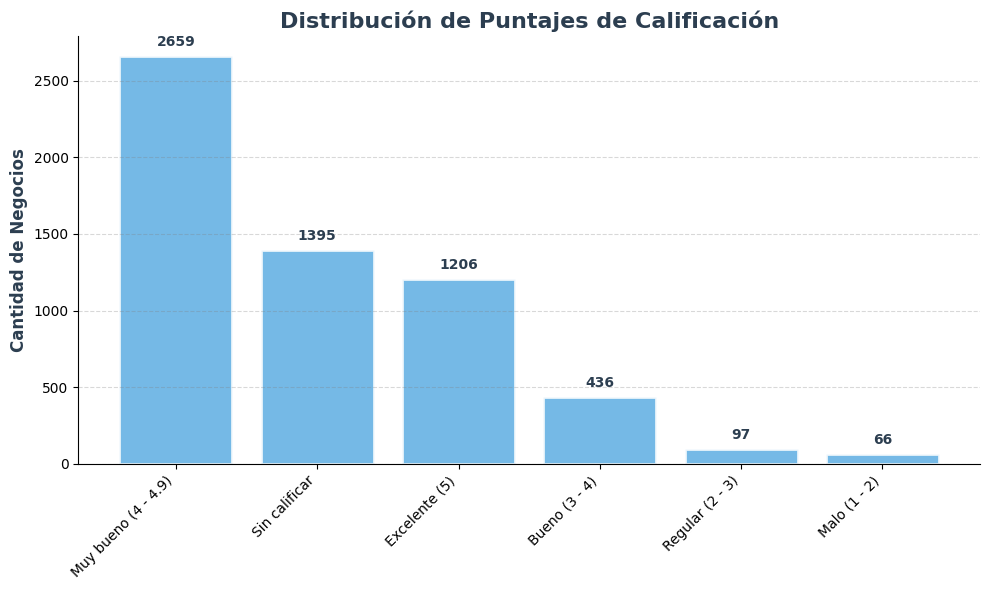

📊 Estadísticas por categorías:
🔹 Muy bueno (4 - 4.9): 2,659 negocios (45.38%)
🔹 Sin calificar: 1,395 negocios (23.81%)
🔹 Excelente (5): 1,206 negocios (20.58%)
🔹 Bueno (3 - 4): 436 negocios (7.44%)
🔹 Regular (2 - 3): 97 negocios (1.66%)
🔹 Malo (1 - 2): 66 negocios (1.13%)


In [93]:
def categorize_score(score):
    if score == 0: return "Sin calificar"
    elif score <= 2: return "Malo (1 - 2)"
    elif score <= 3: return "Regular (2 - 3)"
    elif score <= 4: return "Bueno (3 - 4)"
    elif score < 5: return "Muy bueno (4 - 4.9)"
    else: return "Excelente (5)"
df['score_category'] = df['totalScore'].apply(categorize_score)
cat_counts = df['score_category'].value_counts()
plt.figure(figsize=(10, 6), facecolor='white')
bars = plt.bar(range(len(cat_counts)), cat_counts.values, color='#5DADE2', 
               alpha=0.85, edgecolor='white', linewidth=2)
plt.title('Distribución de Puntajes de Calificación', fontsize=16, fontweight='bold', color='#2C3E50')
plt.xticks(range(len(cat_counts)), cat_counts.index, rotation=45, ha='right')
plt.ylabel('Cantidad de Negocios', fontsize=12, fontweight='bold', color='#2C3E50')

# Etiquetas arriba de barras
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom',
                fontweight='bold', fontsize=10, color='#2C3E50')

plt.grid(True, alpha=0.3, axis='y', linestyle='--', color='gray')
for spine in ['top', 'right']: plt.gca().spines[spine].set_visible(False)
plt.tight_layout(); plt.show()
print("📊 Estadísticas por categorías:")
for category, count in cat_counts.items():
    print(f"🔹 {category}: {count:,} negocios ({count/len(df)*100:.2f}%)")


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

📊 Distribución de puntuaciones:
La mayoría de los negocios tienen muy buenas calificaciones:
- 45.38% están en la categoría Muy bueno (4 - 4.9)
- 20.58% alcanzan Excelente (5)

También hay un 23.81% sin calificar, lo cual muestra que todavía falta información en muchos casos.

En general, los negocios se concentran en la parte alta de la escala,
lo que refleja buena percepción de los clientes.

</div>

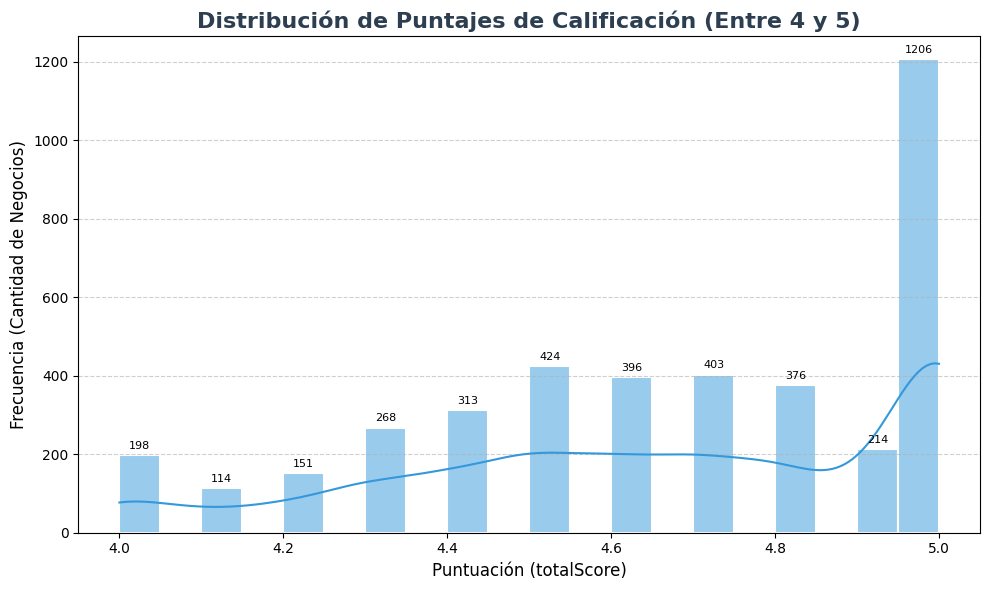

In [94]:
# Filtra el DataFrame para incluir solo los puntajes entre 4 y 5
puntajes_4_a_5 = df[(df['totalScore'] >= 4) & (df['totalScore'] <= 5)]

# --- Creación del Histograma ---
plt.figure(figsize=(10, 6))

# Usamos sns.histplot para mostrar la frecuencia de los puntajes
ax = sns.histplot(data=puntajes_4_a_5, x='totalScore', bins=20, kde=True,
             color='#3498db', edgecolor='white', linewidth=1.5)

# --- Añadir Etiquetas de Valor ---
# Itera sobre cada barra (patch) del histograma para agregar el texto con la cuenta
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

# --- Personalización Estética ---
plt.title('Distribución de Puntajes de Calificación (Entre 4 y 5)', fontsize=16, fontweight='bold', color='#2C3E50')
plt.xlabel('Puntuación (totalScore)', fontsize=12)
plt.ylabel('Frecuencia (Cantidad de Negocios)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

### 📊 Distribución de Puntuaciones Detallada (Entre 4 y 5)

📊 Distribución de Puntuaciones (4.0 - 5.0)
Este histograma muestra la distribución de las puntuaciones de calidad entre 4.0 y 5.0, revelando dónde se concentra la mayoría de las calificaciones.

📈 Hallazgos Clave
Puntuaciones Altas y Consistentes: La mayoría de los negocios obtienen calificaciones entre 4.0 y 4.5. Esto indica que los clientes están muy satisfechos, pero hay una oportunidad para que los negocios mejoren para alcanzar la perfección.

Pico en 5.0: Un gran número de negocios tiene la puntuación máxima de 5.0. Este pico resalta una fuerte cultura de calidad en la región y demuestra que muchos negocios sobresalen en la experiencia del cliente.

</div>

---

## 📌 Conclusión Final

- **Presencia digital limitada:** solo alrededor de 1 de cada 4 comercios tiene un sitio web o perfil digital completo. Esto refleja una **brecha de digitalización** que podría ser una oportunidad de mejora para muchos negocios.  

- **Redes sociales como canal principal:** Instagram y Facebook concentran la mayor parte de la visibilidad online, confirmando que los comercios priorizan el contacto directo con clientes a través de plataformas sociales.  

- **Alta satisfacción del cliente:** la mayoría de los negocios obtiene calificaciones entre 4 y 5 estrellas. Esto indica que la **percepción del cliente es positiva** en general.  

- **Falta de datos en reseñas:** casi una cuarta parte de los negocios no tiene puntuación. Esto limita la evaluación de su reputación y muestra que **todavía hay poca interacción de usuarios en línea**.  

- **Categorías dispersas:** existen más de 600 categorías distintas, lo que dificulta encontrar patrones. Agruparlas en conjuntos más generales permitiría un análisis más claro y accionable.  

---

👉 En síntesis, los comercios analizados muestran **alto nivel de satisfacción de clientes**, pero enfrentan **desafíos en digitalización, visibilidad online y estandarización de datos**. Esto abre espacio para estrategias de transformación digital y mejor uso de la información.


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">


</div>